# 결정 트리

분류 모델 중 하나. 예측을 수행하는 과정이 직관적이고 이해하기 쉽다는 특징 有

균일도라는 규칙을 가지고 데이터를 분류.

* `정보 균일도`
* (1) `지니계수`: 지니계수가 낮을수록 균일도가 높다고 본다.
* (2) `정보이득`: 엔트로피 개념 기반. 엔트로피 = 데이터의 혼잡도. ( 1 - 엔트로피 )로 계산하여 정보이득이 높을수록 균일도가 높다고 보며 높은 값을 우선 기준으로 잡고 분할한다.

지니계수가 0이되느 노드 = 리프노드로 데이터의 클래스를 결정한다.

* 특징: 모델의 넣기전 데이터에 관해 스케일링, 정규화가 필수는 아니다. `과적합` 문제로 정확도가 떨어진다는 문제가 있다


## 결정 트리의 파라미터

* `min_samples_split`: 노드 안에 value의 합이 min_samples_split 에 지정해준 값보다 작으면 분할하지 않고 리프 노드가 된다
* `min_samples_leaf`
* `max_featrues`
* `max_depth`
* `max_leaf_nodes`

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 데이터 가져오기
wine = pd.read_csv("https://bit.ly/wine_csv_data")

data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [6]:
# 훈련-테스트 데이터 나누기
from sklearn.model_selection import train_test_split

train_input , test_input, train_target, test_target = train_test_split(data,
                                                                      target, test_size = 0.2,
                                                                      random_state = 42)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
# 결정 트리
dt = DecisionTreeClassifier(random_state =42)

dt.fit(train_input, train_target)

print("훈련 세트의 예측 정확도: ",dt.score(train_input, train_target))
print("테스트 세트의 예측 정확도: ",dt.score(test_input, test_target))

훈련 세트의 예측 정확도:  0.996921300750433
테스트 세트의 예측 정확도:  0.8584615384615385


In [9]:
from sklearn.tree import plot_tree

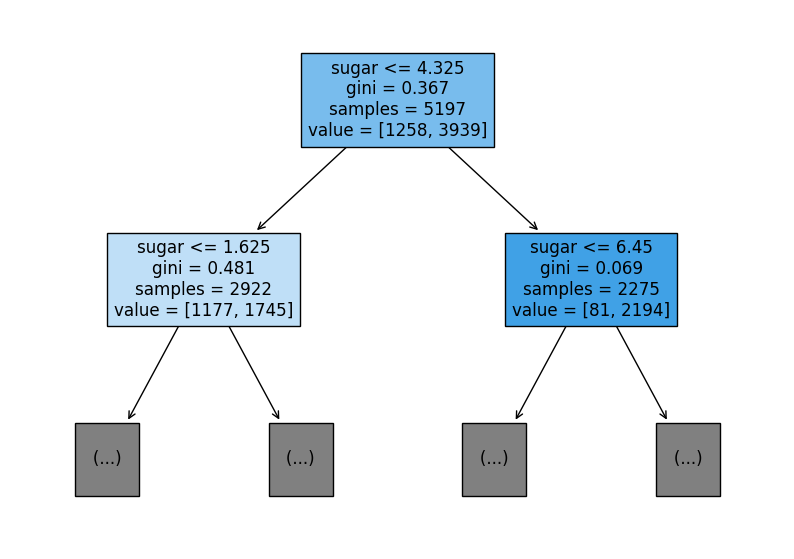

In [10]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

# 가지치기

최대 성장할 수 있는 노드를 지정, `max_depth`으로 지정한다.

훈련 세트의 성능은 낮아졌지만 이해하기 쉬움

In [11]:
dt = DecisionTreeClassifier(max_depth=3,random_state =42)

dt.fit(train_input, train_target)

print("훈련 세트의 예측 정확도: ",dt.score(train_input, train_target))
print("테스트 세트의 예측 정확도: ",dt.score(test_input, test_target))

훈련 세트의 예측 정확도:  0.8454877814123533
테스트 세트의 예측 정확도:  0.8415384615384616


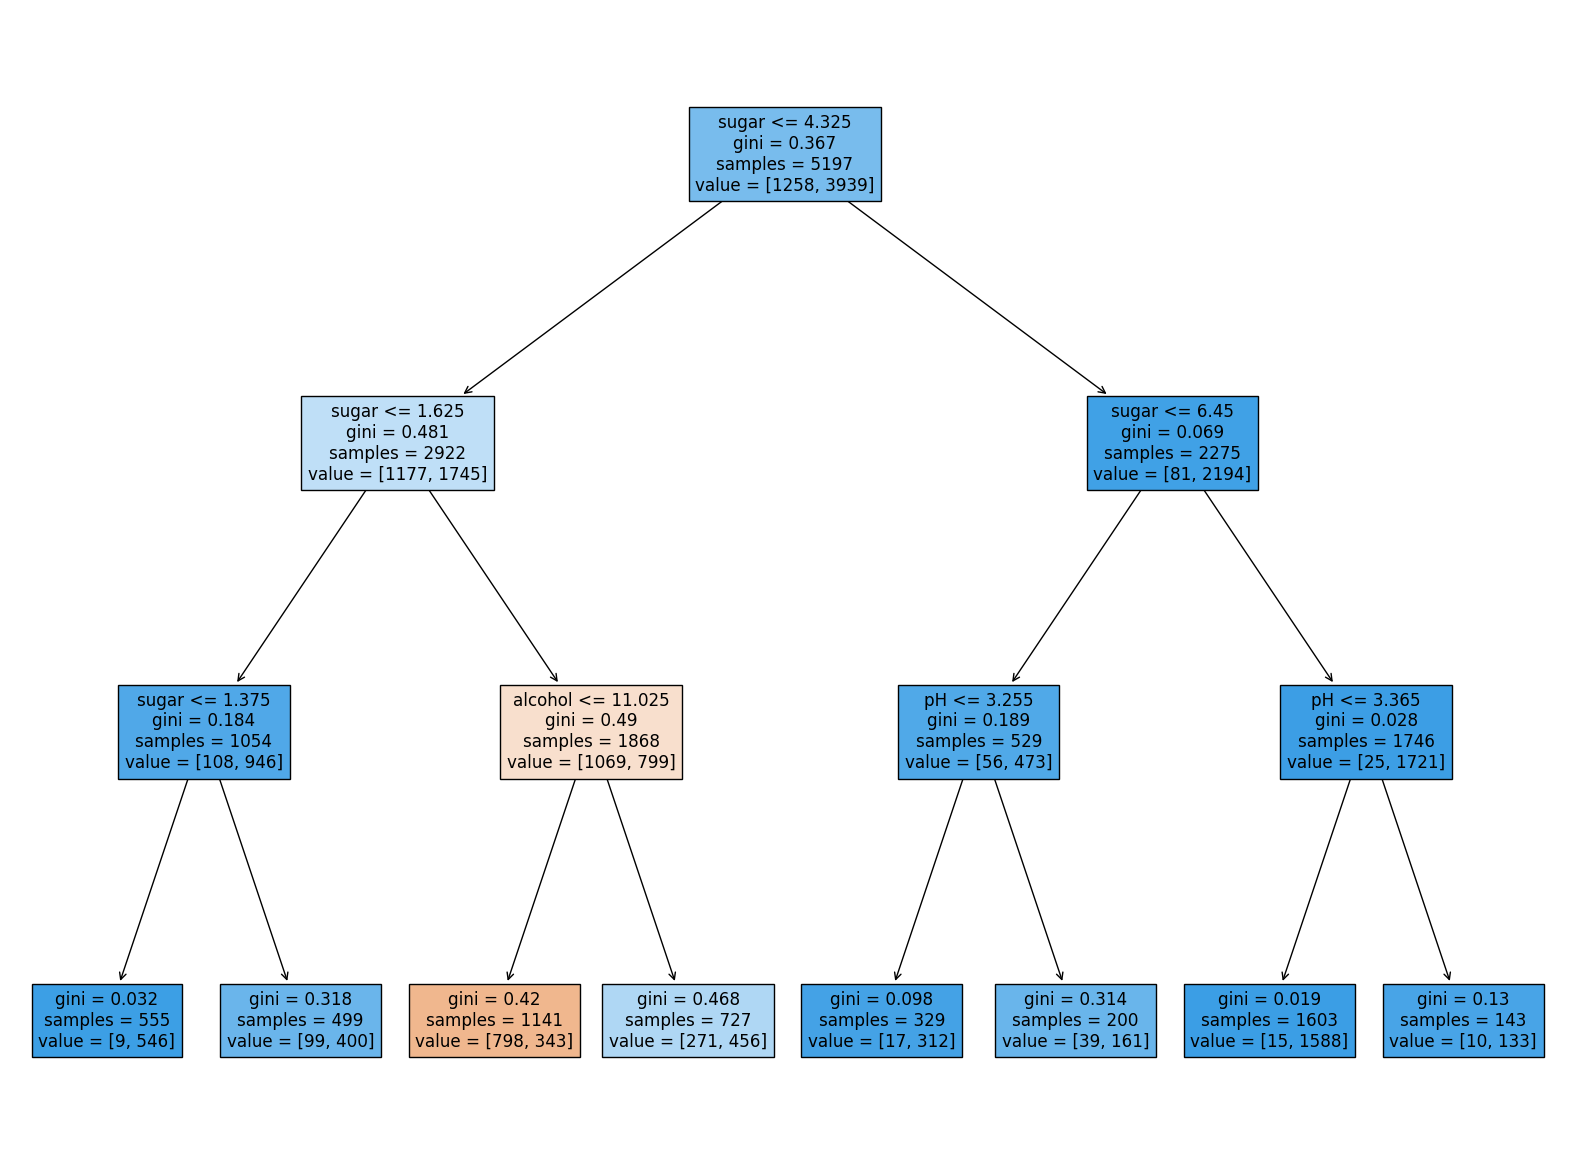

In [12]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

# 결정 트리 특성 중요도 시각화

In [13]:
import warnings
import seaborn as sns
from sklearn.tree import export_graphviz

warnings.filterwarnings('ignore')

In [29]:
feature_names = ['alcohol','sugar','pH']
print(feature_names)
print(dt.feature_importances_)

['alcohol', 'sugar', 'pH']
[0.12345626 0.86862934 0.0079144 ]


Text(0, 0.5, 'feature')

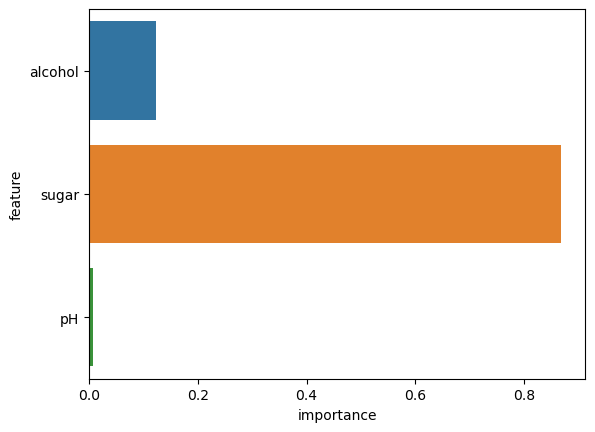

In [33]:
sns.barplot(y =feature_names, x =dt.feature_importances_)
plt.xlabel("importance")
plt.ylabel("feature")

# 결정트리 과적합

In [34]:
from sklearn.datasets import make_classification

In [35]:
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

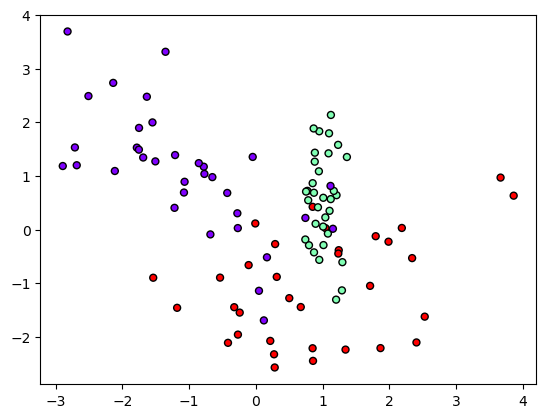

In [36]:
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [37]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

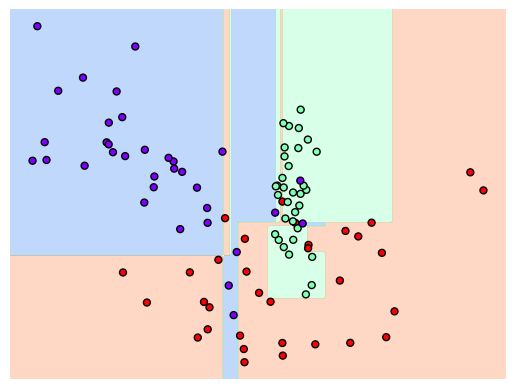

In [38]:
# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

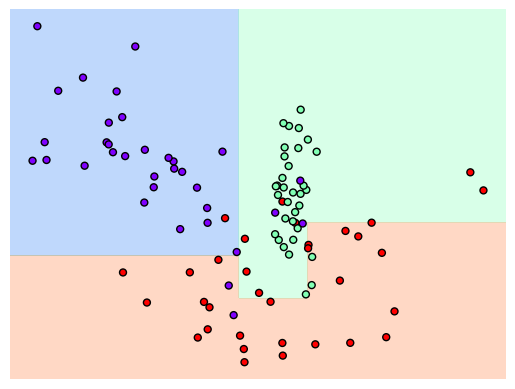

In [39]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

-> 하이퍼 파라미터 `min_samples_leaf`을 조정하여 이상치에 크게 반응하지 않는 일반화된 분류 규칙을 적용하는 모델이 되었다.